In [1]:
# Python t-test,z-test,f-test

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:\\Desktop\\employees.csv")

In [4]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
# Checking for null values

df.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

In [7]:
#Checking for duplicate values

df.duplicated().sum()

3008

In [8]:
df = df.drop_duplicates(subset = None,keep = "first")

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [11]:
# Visualize

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
col = list(df.columns)

In [14]:
# Getting a glance on our structure of data

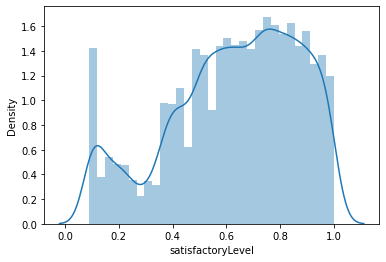

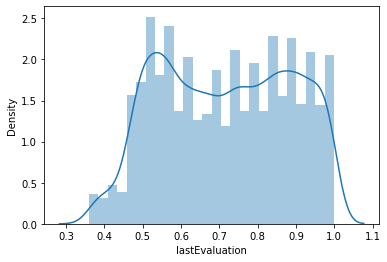

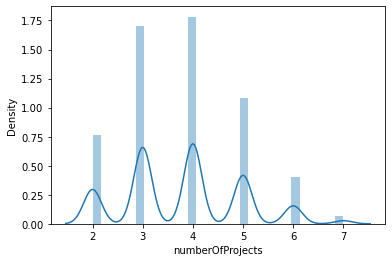

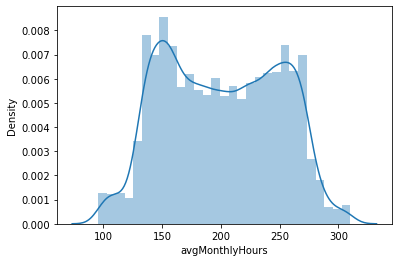

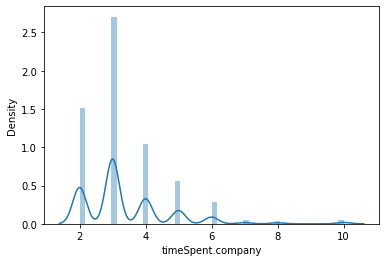

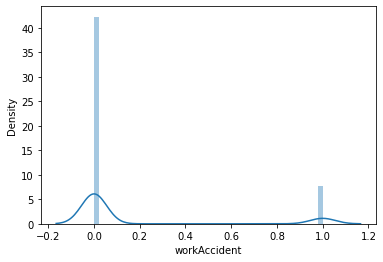

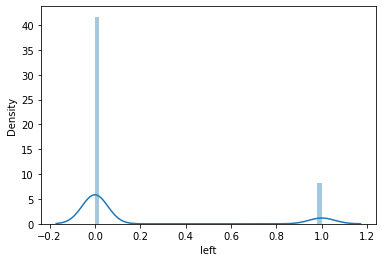

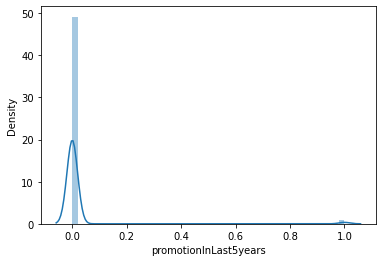

In [15]:
for i in col:
    if df[i].dtype!= "object":
        sns.distplot(df[i])
        plt.show()

In [16]:
# Heatmap

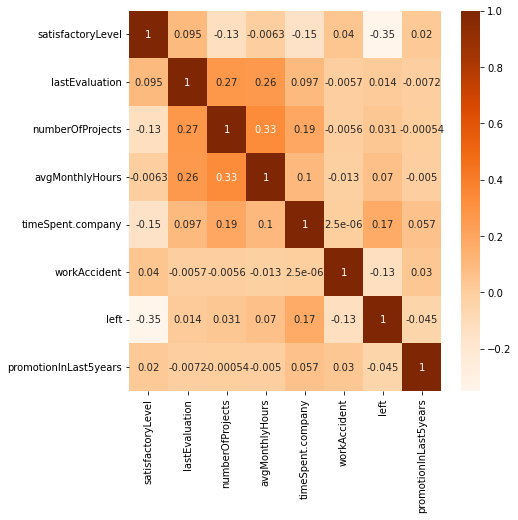

In [17]:
plt.figure(figsize = (7,7))
sns.heatmap(df.corr(),annot= True,cmap = "Oranges")
plt.show()

In [18]:
#From the above correlation graph we can clearly see that satisfation level and the amount of people leaving the 
#company is having a -ve correlation that mean when the satisfaction level increases the amount of people leaving the
#organisation decreases and vise versa so we can tell that the feature satisfation plays a very important part 

# then we can see a positive reationship between the avg monthly hours and number of projects which indicates that 
# when the number of projects are increasing the employee might have to work for more hours 

# we can also see a -ve relatioinship between the time spent in the company and the satisfation level, means that when 
# an employee is spenting most of thier time working in office are not satisfied 


In [19]:
# lets try to analyse a little deeper



In [20]:
col.remove("avgMonthlyHours")

In [21]:
col.remove("left")

In [22]:
col.remove("lastEvaluation")

In [23]:
col.remove("satisfactoryLevel")

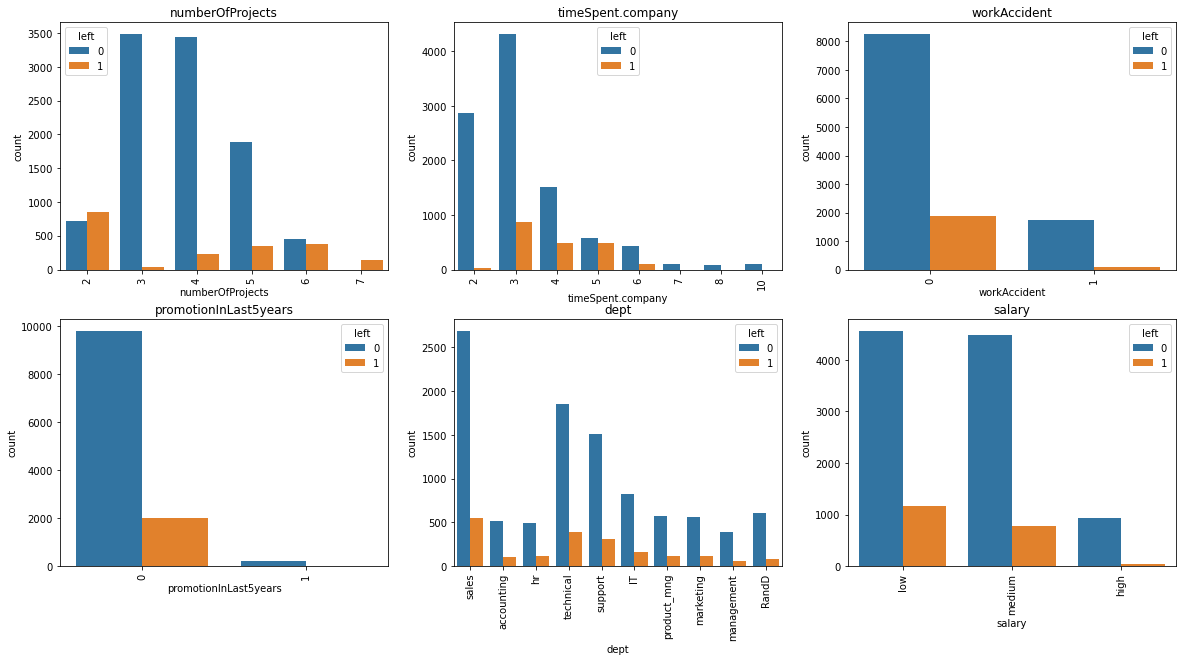

In [24]:
plt.figure(figsize = (20,10))
for p,q in enumerate(col,start = 1):
    plt.subplot(2,3,p)
    sns.countplot(x = q,data = df,hue = "left")
    plt.title(q)
    plt.xticks(rotation = 90)
    

In [25]:
# From the above graphs we can say that Employees are leaving the oranization when there is lack in project work as 
# they might not be gaining any new skills without sufficiant projects and employees are also leaving the organization 
# when the number of projects given more than the limit as it might be hectic for the employees

# we can also say that people with experiance of 3-5 years are trying to leave the organisation, maybe its because they are 
# not paid much or they have the relevent skills and experiance and are trying to switch to a diffrent orgaisation

# people are also leaving when they are not given the promotoin at the right time

# sales, technical and IT are the departments where employees are tryining to leave

# employees are also leaving the organization if they are provided with a lower salary

<AxesSubplot:xlabel='satisfactoryLevel', ylabel='lastEvaluation'>

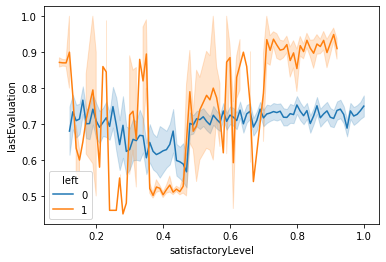

In [26]:
sns.lineplot(x = "satisfactoryLevel",y ="lastEvaluation",data = df,hue = "left" )

<AxesSubplot:xlabel='satisfactoryLevel', ylabel='avgMonthlyHours'>

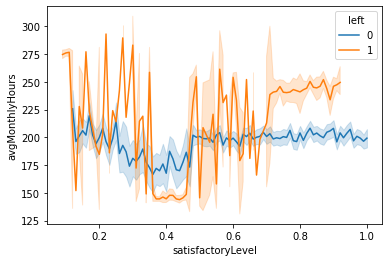

In [27]:
sns.lineplot(x = "satisfactoryLevel",y ="avgMonthlyHours",data = df,hue = "left" )

In [28]:
# from the above 2 graphs we can see that the people with a fluctuating working hours and satisfaction level are 
# leaving the organisation and the people who are having a constant working hours are staying 

In [29]:
# lets work on some hypothesis part

<AxesSubplot:xlabel='satisfactoryLevel', ylabel='Density'>

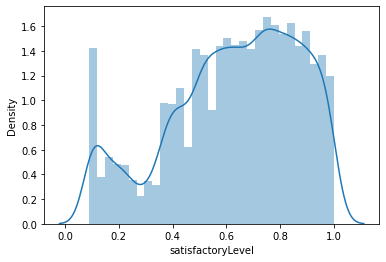

In [30]:
sns.distplot(df["satisfactoryLevel"])

In [31]:
#in the above figure we cant say that our dataset is symmetrical so lets try to prove it with hypothesis testing

In [32]:
# now we will be checking with the shapiro wilk test

In [33]:
# Hypothesis

# H0 - Data is Normally distributed
# H1 - Data is not Normally distrbuted

# here if p<0.05 then we will reject the null hypothess

In [34]:
# The Shapiro-Wilk test is a statistical test used to determine whether a set of data is normally distributed.
# It is a parametric test, which means that it makes assumptions about the distribution of the data.
# The null hypothesis of the Shapiro-Wilk test is that the data are normally distributed,
# while the alternative hypothesis is that the data are not normally distributed.

# The Shapiro-Wilk test is commonly used in hypothesis testing, as a preliminary step to check
# the normality assumption of many parametric tests, such as t-tests and ANOVA. The test works
# by calculating a test statistic W, which measures how well the data fit a normal distribution.
# If the value of W is close to 1, then the data are normally distributed. If the value of W is
# significantly different from 1, then the null hypothesis is rejected, and the data are assumed
# to not be normally distributed.

# The Shapiro-Wilk test is sensitive to sample size, and it is recommended to use it for sample
# sizes of less than 50. For larger sample sizes, other tests, such as the Kolmogorov-Smirnov test,
# may be more appropriate. It is also important to note that even if the Shapiro-Wilk test rejects
# the null hypothesis, it does not necessarily mean that the data are not suitable for parametric tests.
# In such cases, it is recommended to use non-parametric tests or to transform the data to achieve normality.

In [35]:
from scipy.stats import shapiro

In [36]:
stat,p_value = shapiro(df["satisfactoryLevel"])

In [37]:
print(p_value)

0.0


In [38]:
# scince the p_value is less that 0.05 we will be rejecting the null hypothesis 
#so here since the satisfactory level is not normally distributed 
# we can consider this data to be the reason for the more number of atrition rate

In [39]:
# T-test

In [40]:
# T-Test = A t test is a statistical test that is used to compare the means of two groups.
# It is often used in hypothesis testing to determine whether a process or treatment actually
# has an effect on the population of interest,
# or whether two groups are different from one another.

In [41]:
# we are performing here the one sample T- Test as it will let us know about the mean of the sample and the population are
# diffrent or not.

In [ ]:
# now we need to check the below 
# h0 = sample mean = population mean
# h1 = sample mean != population mean

In [55]:
df = df.rename(columns = {"timeSpent.company":"timeSpent_company"})

In [57]:
df.describe()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [64]:
emp = df[(df.avgMonthlyHours>225)]

In [65]:
emp["left"].value_counts()

0    3261
1     998
Name: left, dtype: int64

In [67]:
#so here we can see that people who are working for more than 225 avg monthly hours are more likely to leave the job

In [68]:
# lets first confirm if our population mean is diffrent from our sample mean using one sampel t test for satisfactoryLevel 

In [69]:
emp.mean()

satisfactoryLevel          0.618835
lastEvaluation             0.762848
numberOfProjects           4.210613
avgMonthlyHours          254.963137
timeSpent_company          3.569852
workAccident               0.144165
left                       0.234327
promotionInLast5years      0.016671
dtype: float64

In [70]:
# now we are going to take out sample from emp

In [71]:
sample_size = 100

In [73]:
sample = emp.sample(sample_size,random_state = 42)

In [86]:
sample["avgMonthlyHours"].mean()

257.14

In [85]:
emp["avgMonthlyHours"].mean()

254.9631368865931

In [76]:
# now we got the Sample mean of  avgMonthlyHours as 257 and population mean 255

In [77]:
# now we are going to perform one sample t-test

In [79]:
from scipy.stats import ttest_1samp

In [87]:
statistic,p_value = ttest_1samp(sample["avgMonthlyHours"],emp["avgMonthlyHours"].mean())
print(statistic,p_value)

1.2804844413959333 0.20336676408053317


In [88]:
n = len(emp["avgMonthlyHours"])
degrees_of_freedom = n-1
degrees_of_freedom

4258

In [89]:
alpha = 0.05

In [90]:
# now we are going to calculate the critical value 
# i agree that we dont need to calculate the critical value 
# as we have alredy found out p_value and it is more than
# enough to check reject or accept our hypothesis
# but we have to do this because it will be usefull
# to check for a lot of information such as which tail
# positive or negative etc

In [91]:
from scipy.stats import t

In [92]:
critical_value = t.ppf([alpha/2,1-alpha/2],degrees_of_freedom)
critical_value

array([-1.96052127,  1.96052127])

In [93]:
# so hence we cant reject  h0 as p value is greater than 0.05
#and statistic value that is 1.2804844413959333 is between critical_value([-1.96052127,  1.96052127])

In [94]:
# now we need to check the below 
# h0 = sample mean = population mean
# h1 = sample mean != population mean

In [95]:
# Z-TEST

In [96]:
# so now weare going to calculate the sample z-test

In [ ]:
#so here we can see that people who are working for more than 225 avg monthly hours are more likely to leave the job

In [97]:
# now we need to check the below 
# h0 = employees with avg monthly hrs <255 are leaving the company 
# h1 = employees with avg monthly hrs >255 are leaving the company 

In [99]:
from statsmodels.stats.proportion import proportions_ztest

In [101]:
emp.head() # our population data

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
5,0.10,0.77,6,247,4,0,1,0,sales,low
6,0.92,0.85,5,259,5,0,1,0,sales,low
9,0.11,0.81,6,305,4,0,1,0,sales,low


In [102]:
sample_size = 100
sample1 = emp.sample(sample_size,random_state = 0)

In [104]:
sample1.head() #our sample data

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
97,0.83,1.00,5,240,5,0,1,0,support,low
2643,0.64,0.50,6,254,6,0,0,0,RandD,medium
1385,0.33,0.88,6,260,3,0,0,0,technical,low
5056,0.71,0.80,5,248,4,0,0,0,management,medium
7754,0.62,0.73,3,245,4,0,0,0,IT,low


In [105]:
count = sample1["left"].value_counts()

In [106]:
count

0    77
1    23
Name: left, dtype: int64

In [108]:
nobs = len(sample1["left"])
nobs

100

In [121]:
p0 = 0.3

In [122]:
statistic,p_value = proportions_ztest(count = count,nobs = nobs,value = p0,alternative='two-sided',prop_var=False)
statistic,p_value

(3.394112549695429, 0.0006885138966450754)

In [123]:
# so here we can reject the null hypothesis as p_value is less than .05 hence we can accept the 
# alternate hypothesis

In [124]:
# now we are calculating the critical value

In [126]:
from scipy.stats import norm
cv_norm = norm.ppf([alpha/2,1-alpha/2])
print(cv_norm)

[-1.95996398  1.95996398]


In [127]:
# our z-statistc is greater than critical value(1.95996398) and its a right tailed test

In [130]:
# TWO SAMPLED T-TEST - comparing means of two indipended groups

In [134]:
e1 = df[(df.timeSpent_company>=2)&(df.timeSpent_company<=5)]
e2 = df[(df.timeSpent_company>=6)&(df.timeSpent_company<=10)]

In [135]:
s1 = e1.sample(200,random_state =0)
s2 = e2.sample(200,random_state =0)

In [136]:
import scipy

In [137]:
scipy.stats.ttest_ind(s1["avgMonthlyHours"],s2["avgMonthlyHours"])

Ttest_indResult(statistic=-0.058969634159925566, pvalue=0.9530058909644643)

In [138]:
# so here p_value is greater than .05 so we will be accepting the null hypothesis and will
# be rejecting the alternate hypothesis that is is the mean avg monthly hours of emp having
# exp of 2-5 yrs is the same as that of having exp 6-10 yrs
# so by this we can say that this result is one of the reason for more number of attrition rate 
# as we can see that emp having more experiance are also working same hrs as less exp

In [139]:
# F-TEST

In [140]:
# F-test for variance is used test if variance of 2 population are equal or not

In [141]:
# sample variance

In [151]:
# now we need to check the below 
# h0 = variance is equal
# h1 = variance is not equal

In [142]:
print(s1["avgMonthlyHours"].var())
print(s2["avgMonthlyHours"].var())

2324.24620603015
2680.904522613066


In [143]:
# sample mean
print(s1["avgMonthlyHours"].mean())
print(s2["avgMonthlyHours"].mean())

203.005
203.3


In [144]:
df1 = len(s1)-1
df2 = len(s2)-1
print(df1,df2)

199 199


In [145]:
# compute f-statistic

In [146]:
from scipy.stats import f
F = s1["avgMonthlyHours"].var()/s2["avgMonthlyHours"].var()
F

0.8669634395501401

In [147]:
import scipy.stats

In [148]:
p_value = scipy.stats.f.cdf(F,df1,df2)
p_value

0.15739115729495057

In [149]:
f.ppf([alpha/2,1-alpha/2],df1,df2)

array([0.75678659, 1.32137648])

In [150]:
# so here p_value is greater than 0.05 so here we accept the null hypothesis